In [2]:
#data wrangling
import pandas as pd

#datetime
import datetime as dt
import numpy as np

In [3]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
kpmg_Transactions= pd.read_excel("KPMG.xlsx", sheet_name="Transactions")
kpmg_Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# in ra info bảng
kpmg_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
# describe default
type(kpmg_Transactions)

pandas.core.frame.DataFrame

In [6]:
# describe các biến object
print(kpmg_Transactions["transaction_id"].dtype)
print(kpmg_Transactions["product_id"].dtype)
print(kpmg_Transactions["customer_id"].dtype)
print(kpmg_Transactions["transaction_date"].dtype)
print(kpmg_Transactions["online_order"].dtype)
print(kpmg_Transactions["order_status"].dtype)
print(kpmg_Transactions["brand"].dtype)
print(kpmg_Transactions["product_line"].dtype)
print(kpmg_Transactions["product_class"].dtype)
print(kpmg_Transactions["product_size"].dtype)
print(kpmg_Transactions["list_price"].dtype)
print(kpmg_Transactions["standard_cost"].dtype)
print(kpmg_Transactions["product_first_sold_date"].dtype)

int64
int64
int64
datetime64[ns]
float64
object
object
object
object
object
float64
float64
float64


In [7]:
#describe all
kpmg_Transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [8]:
# count số dòng bị null ở mỗi cột
kpmg_Transactions.isna().any()
kpmg_Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [9]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all= kpmg_Transactions.dropna(how="all")
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order= kpmg_Transactions.dropna(subset=["online_order"], how= "all")
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [11]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0= kpmg_Transactions.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill= kpmg_Transactions.fillna(method="ffill")
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [13]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill= kpmg_Transactions.fillna(method="bfill")
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorial Data

In [14]:
# load sheet Demographic và hiển thị top head
kpmg_Demographic= pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")
kpmg_Demographic["DOB"]=pd.to_datetime(kpmg_Demographic["DOB"], format="%Y-%m-%d")
kpmg_Demographic.head()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_18160/1460065478.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  kpmg_Demographic= pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [15]:
# in ra info bảng 
kpmg_Demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [16]:
# describe các giá trị object
kpmg_Demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [17]:
# Remove all NA row
kpmg_Demographic=kpmg_Demographic.dropna(how="any")
kpmg_Demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [18]:
# In ra các giá trị unique của cột gender
print(kpmg_Demographic["gender"].unique())

['F' 'Male' 'Female' 'Femal']


In [19]:
# Quy chuẩn cột Gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
kpmg_Demographic_new= kpmg_Demographic.replace({"gender":{"F":"Female","M":"Male","U":"Unisex", "Femal":"Female"}})
print(kpmg_Demographic_new["gender"].unique())

['Female' 'Male']


In [20]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "Age" và in ra min age, max age
from datetime import datetime

now= datetime.now()
year_now= int(now.strftime("%Y"))
kpmg_Demographic_new["year_now"]=year_now
kpmg_Demographic_new["age"]= kpmg_Demographic_new["year_now"]-kpmg_Demographic_new["DOB"].dt.year
#print(kpmg_Demographic_new["age"])
print(kpmg_Demographic_new["age"].min())
print(kpmg_Demographic_new["age"].max())

20
91


In [21]:
kpmg_Demographic_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,year_now,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,2022,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,2022,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,2022,68
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,2022,49
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,2022,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,á,No,10.0,2022,48
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,-100,No,12.0,2022,33
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0,2022,47
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,2022,47


In [22]:
kpmg_Demographic_new=kpmg_Demographic_new.drop(index=kpmg_Demographic_new[kpmg_Demographic_new["age"]==179].index)

In [23]:
kpmg_Demographic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [24]:
kpmg_Demographic_new["age"].unique()

array([69, 42, 68, 49, 34, 28, 67, 39, 22, 21, 45, 46, 44, 54, 60, 27, 59,
       37, 43, 41, 47, 30, 63, 56, 66, 26, 55, 57, 20, 29, 50, 33, 48, 38,
       62, 24, 25, 32, 23, 40, 65, 58, 35, 52, 51, 64, 36, 53, 31, 61, 78,
       91, 87, 79], dtype=int64)

In [25]:
kpmg_Demographic_new=kpmg_Demographic_new.dropna(how="any")

In [26]:
kpmg_Demographic_new["age"]=kpmg_Demographic_new.age.astype(int)

In [27]:
kpmg_Demographic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [28]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 36 - 55 là "Middle", trên 55 là Older
# lưu vào cột "Age_Group" bằng cách sử dụng hàm cut
kpmg_Demographic_new
conditions = [
    (kpmg_Demographic_new['age'] < 35),
    (kpmg_Demographic_new['age'] >= 35) & (kpmg_Demographic_new['age'] < 55),
    (kpmg_Demographic_new['age'] >= 55)
    ]
values = ['Young', 'Middle', 'Older']
kpmg_Demographic_new['Age_Group'] = np.select(conditions, values)

In [29]:
kpmg_Demographic_new

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,year_now,age,Age_Group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,2022,69,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,2022,42,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,2022,68,Older
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,2022,49,Middle
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,2022,34,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,á,No,10.0,2022,48,Middle
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,-100,No,12.0,2022,33,Young
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0,2022,47,Middle
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,2022,47,Middle


# 2. Data Completeness

In [30]:
#join data sale vs demographic và in ra những trường hợp missing trong demographic
kpmg_Demographic.isna().any()
kpmg_Demographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [31]:
kpmg_Demographic= pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")

kpmg_merge= kpmg_Demographic_new.merge(kpmg_Transactions, how="inner", on= "customer_id")
kpmg_merge

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_18160/3610151098.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  kpmg_Demographic= pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-03-07,0.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,37659.0
13336,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,2017-04-02,1.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,40303.0
13337,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-11-08,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,42688.0
13338,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,2017-09-01,1.0,Approved,Solex,Standard,medium,medium,575.27,431.45,35160.0


In [32]:
kpmg_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13340 entries, 0 to 13339
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13340 non-null  int64         
 1   first_name                           13340 non-null  object        
 2   last_name                            13340 non-null  object        
 3   gender                               13340 non-null  object        
 4   past_3_years_bike_related_purchases  13340 non-null  int64         
 5   DOB                                  13340 non-null  datetime64[ns]
 6   job_title                            13340 non-null  object        
 7   job_industry_category                13340 non-null  object        
 8   wealth_segment                       13340 non-null  object        
 9   deceased_indicator                   13340 non-null  object        
 10  default   

# 3. Data Aggregation

In [33]:
# tính tổng khách hàng bằng hàm nunique
kpmg_Transactions["customer_id"].nunique()

3494

In [34]:
# Tính số khách khách hàng mỗi tháng
# hint 1: tạo collum year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
kpmg_Transactions["year_month"]= kpmg_Transactions["transaction_date"].dt.strftime("%Y-%m")
kpmg_Transactions["month"]= kpmg_Transactions["transaction_date"].dt.strftime("%m")
kpmg_Transactions["month"]=kpmg_Transactions.month.astype(int)
kpmg_Transactions.groupby("year_month").count()["customer_id"].unique

<bound method Series.unique of year_month
2017-01    1682
2017-02    1623
2017-03    1656
2017-04    1655
2017-05    1685
2017-06    1581
2017-07    1717
2017-08    1749
2017-09    1572
2017-10    1771
2017-11    1665
2017-12    1644
Name: customer_id, dtype: int64>

In [35]:
# Tính Gross magin của mỗi tháng. Gross magin = list_price - standard_cost
# hint 1: tạo collum Gross_Margin
# hint 2: group by year_month và sử dụng hàm agg
kpmg_Transactions["Gross_Margin"]= kpmg_Transactions["list_price"] - kpmg_Transactions["standard_cost"]
kpmg_Transactions.groupby(["year_month"]).sum()["Gross_Margin"]

year_month
2017-01    929487.739988
2017-02    870819.060000
2017-03    879243.400000
2017-04    904691.310000
2017-05    913742.610000
2017-06    859571.550000
2017-07    938619.290000
2017-08    970452.520000
2017-09    862290.490000
2017-10    984973.464984
2017-11    924938.460000
2017-12    891454.070000
Name: Gross_Margin, dtype: float64

In [36]:
kpmg_Transactions["online_order"].unique()

array([ 0.,  1., nan])

In [37]:
kpmg_Transactions["order_status"].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [38]:
kpmg_Transactions["brand"].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [39]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
kpmg_Transactions.groupby(["online_order"]).count()["transaction_id"]


online_order
0.0    9811
1.0    9829
Name: transaction_id, dtype: int64

In [40]:
kpmg_Transactions.groupby(["online_order"]).sum()["list_price"]

online_order
0.0    10863612.13
1.0    10880168.36
Name: list_price, dtype: float64

In [41]:
kpmg_Transactions.groupby(["order_status"]).count()["transaction_id"]

order_status
Approved     19821
Cancelled      179
Name: transaction_id, dtype: int64

In [42]:
kpmg_Transactions.groupby(["order_status"]).sum()["list_price"]

order_status
Approved     21954196.69
Cancelled      202392.29
Name: list_price, dtype: float64

# 4. Data Visualization

In [43]:
# Sử dụng seaborn và vẽ ra 5 loại chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
import matplotlib.pyplot as plt
import seaborn as sns



[Text(0.5, 1.0, 'Số lượng khách hàng ở các nhóm tuổi')]

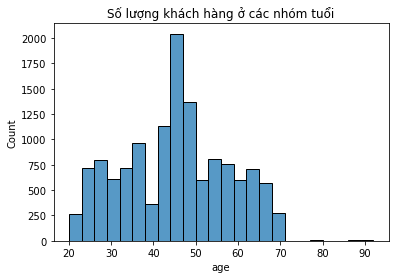

In [44]:
#histogram
sns.histplot(data= kpmg_merge, x="age", bins=10,binwidth=3).set(title='Số lượng khách hàng ở các nhóm tuổi')

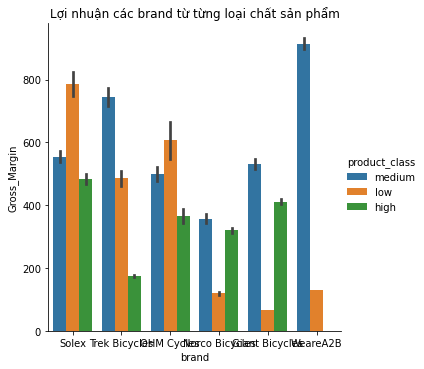

In [45]:
#barchart
sns.catplot(x= 'brand', y= "Gross_Margin",data= kpmg_Transactions, kind="bar", hue= 'product_class').set(title="Lợi nhuận các brand từ từng loại chất sản phẩm")


In [46]:
#box
sns.boxplot(x="month", y="list_price",
            hue="Age_Group",
            data=kpmg_merge).set(title="Tỷ lệ doanh thu các nhóm tuổi trong năm 2017")
sns.despine(offset=70)

ValueError: Could not interpret input 'month'

In [ ]:
y= kpmg_Transactions["Gross_Margin"].sum()
x=kpmg_Transactions['order_status']
plt.bar(x, y)
plt.show()

In [ ]:
sns.distplot(x=kpmg_Transactions["list_price"] , bins=10)

In [ ]:
sns.lineplot(x= kpmg_Transactions["year_month"], y= kpmg_Transactions["Gross_Margin"], hue= kpmg_Transactions["product_line"], data= kpmg_Transactions, ci =None).set(title="Lợi nhuận từng dòng sản ph")

In [ ]:
l =sns.relplot(x= kpmg_merge["year_month"], y= kpmg_merge["list_price"], kind="line", hue= kpmg_merge["product_class"], data= kpmg_merge, ci=None)
l.fig.suptitle("Doanh thu các loai san pham")
plt.show()

g =sns.relplot(x= kpmg_merge["year_month"], y= kpmg_merge["Gross_Margin"], kind="line", hue= kpmg_merge["product_class"], data= kpmg_merge, ci=None)
g.fig.suptitle("Loi nhuan các loai san pham")
plt.show()

In [ ]:
y= kpmg_merge["list_price"].sum()
x=kpmg_merge['gender']
plt.bar(x, y)
plt.show()

In [ ]:
sns.relplot(y=kpmg_merge["Gross_Margin"], x= "list_price", data=kpmg_merge,hue="Age_Group",  kind= "scatter", col= "job_industry_category", col_wrap=3)